<a href="https://colab.research.google.com/github/geothoram/Kaggle-Notebooks/blob/master/FNN_tensorflow_Sep26_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4> Mounting google drive and setting it as the working directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Moho_Mapping

/content/drive/My Drive/Moho_Mapping


In [11]:
%ls

all_data.csv        data_1000_samples.csv         moho_points.xy
crust_interface.xy  FNN_tensorflow.ipynb
crust_points.xy     Generate_training_data.ipynb


In [37]:
import numpy as np
import pandas as pd        # For loading and processing the dataset
import tensorflow as tf    # Of course, we need TensorFlow.
from sklearn.model_selection import train_test_split
import os, sys

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Input, Flatten, Reshape, Conv1DTranspose, Dropout
from tensorflow.keras.metrics import KLDivergence
from tensorflow.keras import Model
from matplotlib import pyplot as plt

In [13]:
# load the dataset
dataset = np.loadtxt('all_data.csv', delimiter=',')
print (dataset.shape)

# split into input (X) and output (y) variables
X = dataset[:,0:100]
y = dataset[:,100:]

(10000, 200)


In [14]:
X = np.round(X,decimals = 2)
y = np.round(y,decimals = 2)

In [15]:
print (X.shape)

(10000, 100)


In [16]:
print (y.shape)

(10000, 100)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [20]:
model_fnn = Sequential()
model_fnn.add(Dense(120, input_dim=100, activation=tf.nn.relu))
model_fnn.add(Dense(200, activation=tf.nn.relu))
model_fnn.add(Dense(100))
opt = tf.optimizers.Adam(learning_rate=0.02)
model_fnn.compile(loss='mae', optimizer=opt,metrics=['accuracy']) # try mse

In [21]:
model_fnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 120)               12120     
                                                                 
 dense_7 (Dense)             (None, 200)               24200     
                                                                 
 dense_8 (Dense)             (None, 100)               20100     
                                                                 
Total params: 56420 (220.39 KB)
Trainable params: 56420 (220.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# fit model
history_fnn=model_fnn.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), batch_size=250)

Epoch 1/500
24/24 [==============================] - 1s 14ms/step - loss: 12.8812 - accuracy: 0.1167 - val_loss: 8.8517 - val_accuracy: 0.0335
Epoch 2/500
24/24 [==============================] - 0s 7ms/step - loss: 8.7886 - accuracy: 0.1817 - val_loss: 8.3475 - val_accuracy: 0.2905
Epoch 3/500
24/24 [==============================] - 0s 7ms/step - loss: 8.4080 - accuracy: 0.2093 - val_loss: 8.2051 - val_accuracy: 0.2905
Epoch 4/500
24/24 [==============================] - 0s 9ms/step - loss: 7.5643 - accuracy: 0.2140 - val_loss: 6.7369 - val_accuracy: 0.1515
Epoch 5/500
24/24 [==============================] - 0s 7ms/step - loss: 6.6792 - accuracy: 0.1977 - val_loss: 6.4710 - val_accuracy: 0.2575
Epoch 6/500
24/24 [==============================] - 0s 6ms/step - loss: 6.4733 - accuracy: 0.2128 - val_loss: 6.3012 - val_accuracy: 0.2650
Epoch 7/500
24/24 [==============================] - 0s 6ms/step - loss: 6.1426 - accuracy: 0.2233 - val_loss: 5.7616 - val_accuracy: 0.2405
Epoch 8/500

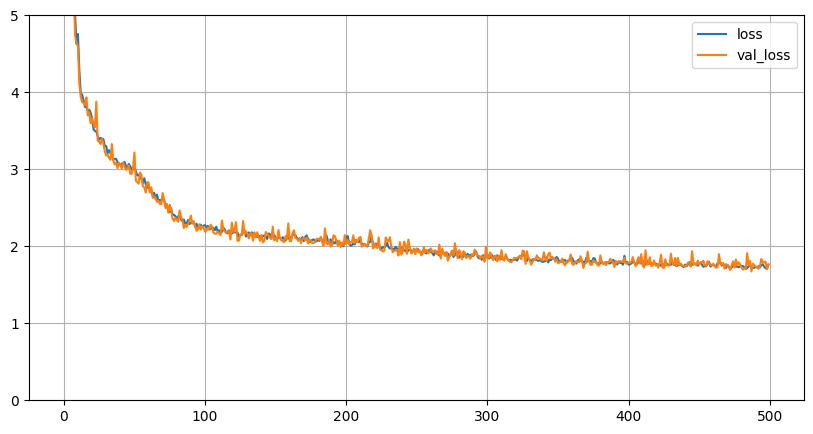

In [25]:
plt.figure(figsize=(10,5))
plt.plot(history_fnn.history['loss'], label='loss')
plt.plot(history_fnn.history['val_loss'], label='val_loss')
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,5)
plt.show()

In [ ]:
print (X_test[0,:].shape)

(100,)


In [ ]:
pred1 = model_fnn.predict(X_test[0,:].reshape(1,-1))

In [ ]:
dataset = np.loadtxt('moho_points.xy', delimiter=' ')
xmoho = dataset[:,0]
zmoho = dataset[:,2]
#print (dataset[:,2])


In [ ]:
x_plot=np.linspace(0,800,100)

Text(0, 0.5, 'z (km)')

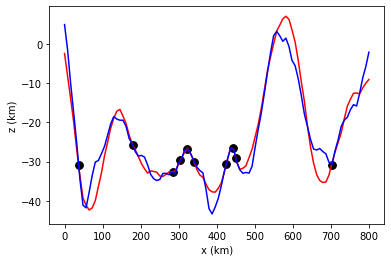

In [ ]:
plt.plot(x_plot, pred1[0],'r')
plt.plot(x_plot,y_test[0,:],'b')
plt.scatter(xmoho,zmoho,marker='o', s=60, c='black')
#plt.legend(loc="upper left")
#plt.plot(y_test[0,:],'b')
plt.xlabel("x (km)")
plt.ylabel("z (km)")

Text(0, 0.5, 'z (km)')

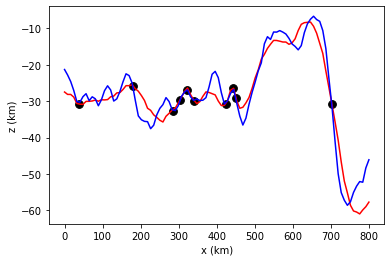

In [ ]:
pred2 = model.predict(X_test[25,:].reshape(1,-1))
plt.plot(x_plot,pred2[0],'r')
plt.plot(x_plot,y_test[25,:],'b')
plt.scatter(xmoho,zmoho,marker='o', s=60, c='black')
#plt.plot(y_test[0,:],'b')
plt.xlabel("x (km)")
plt.ylabel("z (km)")

<h4> Encoder-Decoder Model

In [31]:
# Conv encoder-decoder model
inputs = Input((100,1))

# Encoder
conv1 = Conv1D(8, 5, activation='relu', padding='same')(inputs)
mp1 = MaxPooling1D(2)(conv1)
conv2 = Conv1D(16, 5, activation='relu', padding='same')(mp1)
mp2 = MaxPooling1D(2)(conv2)
conv3 = Conv1D(32, 5, activation='relu', padding='same')(mp2)
mp3 = MaxPooling1D(2)(conv3)
latent = Flatten()(mp3)

# Decoder
reshape = Reshape((12,32))(latent)
convTrans1 = Conv1DTranspose(32, 5, activation='relu', padding='same', strides=2)(reshape)
convTrans2 = Conv1DTranspose(16, 5, activation='relu', padding='same', strides=2)(convTrans1)
convTrans3 = Conv1DTranspose(8, 5, activation='relu', padding='same', strides=2)(convTrans2)
flatten = Flatten()(convTrans3)
dense = Dense(100)(flatten)


model_edm = Model(inputs=inputs, outputs=dense)
opt = tf.optimizers.Adam(learning_rate=0.01)
model_edm.compile(loss="mae", optimizer=opt,metrics=['accuracy']) # try mse
model_edm.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 1)]          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 100, 8)            48        
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 50, 8)             0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 50, 16)            656       
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 25, 16)            0         
 ng1D)                                                           
                                                                 
 conv1d_11 (Conv1D)          (None, 25, 32)            2592

In [ ]:
# fit model
history_edm=model_edm.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), batch_size=500)

Epoch 1/500
12/12 [==============================] - 2s 62ms/step - loss: 22.2148 - accuracy: 0.0540 - val_loss: 20.5968 - val_accuracy: 0.1395
Epoch 2/500
12/12 [==============================] - 1s 67ms/step - loss: 14.2012 - accuracy: 0.2588 - val_loss: 12.3697 - val_accuracy: 0.2905
Epoch 3/500
12/12 [==============================] - 1s 70ms/step - loss: 10.0118 - accuracy: 0.2712 - val_loss: 8.2667 - val_accuracy: 0.2905
Epoch 4/500
12/12 [==============================] - 1s 70ms/step - loss: 8.7441 - accuracy: 0.2712 - val_loss: 8.2165 - val_accuracy: 0.2905
Epoch 5/500
12/12 [==============================] - 1s 72ms/step - loss: 8.3225 - accuracy: 0.2712 - val_loss: 8.0494 - val_accuracy: 0.2905
Epoch 6/500
12/12 [==============================] - 1s 43ms/step - loss: 8.1458 - accuracy: 0.2712 - val_loss: 7.9455 - val_accuracy: 0.2905
Epoch 7/500
12/12 [==============================] - 0s 41ms/step - loss: 8.0701 - accuracy: 0.2712 - val_loss: 7.9164 - val_accuracy: 0.2905
E

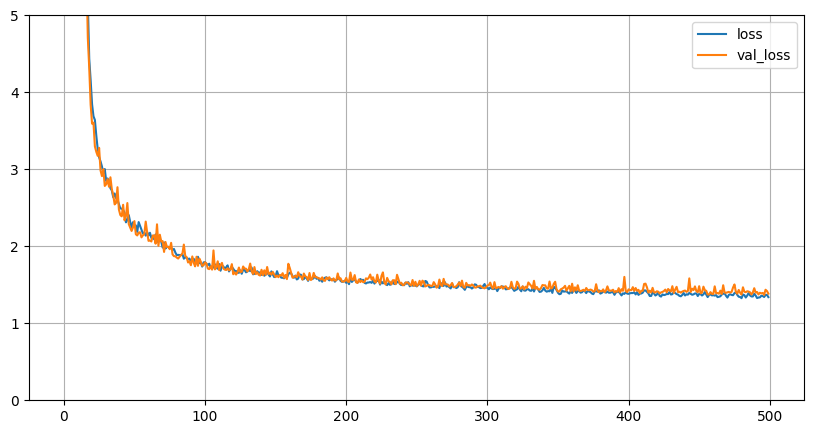

In [33]:
plt.figure(figsize=(10,5))
plt.plot(history_edm.history['loss'], label='loss')
plt.plot(history_edm.history['val_loss'], label='val_loss')
plt.legend()
plt.grid(True)
plt.gca().set_ylim(0,5)
plt.show()

1/1 [==============================] - 0s 165ms/step


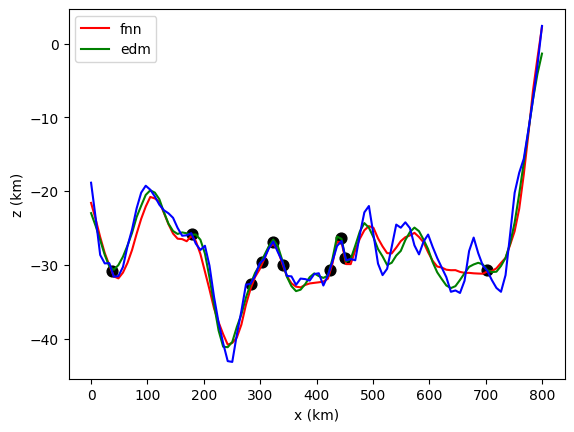

In [36]:
pred1_fnn = model_fnn.predict(X_test[0,:].reshape(1,-1))
pred1_edm = model_edm.predict(X_test[0,:].reshape(1,-1))
x_plot=np.linspace(0,800,100)

dataset = np.loadtxt('moho_points.xy', delimiter=' ')
xmoho = dataset[:,0]
zmoho = dataset[:,2]
#print (dataset[:,2])


plt.plot(x_plot, pred1_fnn[0],'r',label='fnn')
plt.plot(x_plot, pred1_edm[0],'g', label='edm')
plt.plot(x_plot,y_test[0,:],'b')
plt.scatter(xmoho,zmoho,marker='o', s=60, c='black')
#plt.legend(loc="upper left")
#plt.plot(y_test[0,:],'b')
plt.xlabel("x (km)")
plt.ylabel("z (km)")
plt.legend()

<h2> Uncertainity Estimates

In [38]:
print (X_test.shape)

(2000, 100)


In [39]:
# input data
i = 25 # i can range from 0 to 199
in_data = X_test[i,:].reshape(1,-1)

<h4> Using Dropout

In [42]:
# Using Dropout
model = Sequential()
model.add(Dense(120, input_dim=100, activation=tf.nn.relu))
model.add(Dense(200, activation=tf.nn.relu))
#model.add(Dense(8, activation='relu'))
####keras.layers.Dropout(rate=0.3)###
model.add(Dropout(0.3))

model.add(Dense(100))
opt = tf.optimizers.Adam(learning_rate=0.02)
model.compile(loss='mae', optimizer=opt,metrics=['accuracy']) # try mse
history=model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), batch_size=250)

predicted_models_200 = np.stack(model(in_data, training=True) for iter in range(200))
#mean_200 = np.mean(predicted_models_200, dtype=np.float64)
#std_200 = np.std(predicted_models_200, dtype=np.float64)

Epoch 1/500
24/24 [==============================] - 1s 10ms/step - loss: 14.1704 - accuracy: 0.1117 - val_loss: 9.5818 - val_accuracy: 0.2905
Epoch 2/500
24/24 [==============================] - 0s 7ms/step - loss: 9.5544 - accuracy: 0.1558 - val_loss: 8.3848 - val_accuracy: 0.2905
Epoch 3/500
24/24 [==============================] - 0s 6ms/step - loss: 8.8020 - accuracy: 0.1875 - val_loss: 7.9484 - val_accuracy: 0.2905
Epoch 4/500
24/24 [==============================] - 0s 6ms/step - loss: 7.8313 - accuracy: 0.1817 - val_loss: 6.6187 - val_accuracy: 0.2750
Epoch 5/500
24/24 [==============================] - 0s 6ms/step - loss: 7.2289 - accuracy: 0.1912 - val_loss: 6.3781 - val_accuracy: 0.2760
Epoch 6/500
24/24 [==============================] - 0s 6ms/step - loss: 6.8361 - accuracy: 0.1948 - val_loss: 5.8315 - val_accuracy: 0.2695
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 6.5899 - accuracy: 0.2280 - val_loss: 5.8001 - val_accuracy: 0.2830
Epoch 8/500

In [44]:
print (predicted_models_200.shape)
predicted_models_200 = np.squeeze(predicted_models_200)
print (predicted_models_200.shape)

mean_200 = np.mean(predicted_models_200,axis=0)
std_200 = np.std(predicted_models_200,axis=0)
print (std_200)

(200, 100)
(200, 100)
[1.1465712  0.954453   0.779756   0.6865643  0.37198332 0.3416448
 1.2683612  2.225716   3.089231   3.726838   4.2727594  4.71276
 4.9523435  5.1844416  5.384705   5.3888345  5.093248   4.7765446
 4.284415   3.530079   2.4684656  1.3414509  0.22328255 0.87405807
 1.826955   2.7463393  3.355406   3.7695646  3.9787931  3.8272266
 3.6067045  3.0635705  2.3318036  1.5025077  0.75525546 0.12282995
 0.25611144 0.16286087 0.14488372 0.14877824 0.02594545 0.24459314
 0.12932166 0.6612458  1.7596649  2.8492966  3.757261   4.153562
 3.9842474  3.3965726  2.4708467  1.3268821  0.42125806 0.18612692
 0.17942157 0.06321844 0.13304043 0.74277616 1.5995669  2.474451
 3.2597132  3.8272696  4.2813625  4.6493134  4.968515   5.268749
 5.525685   5.826096   6.1613445  6.385276   6.5279646  6.5617113
 6.476433   6.2535596  6.002623   5.7852125  5.474011   5.0393124
 4.546514   4.0773325  3.5711856  3.1544547  2.754364   2.4030488
 1.9675274  1.4375834  0.7865132  0.11001516 1.0899131 

In [50]:
print (y_test[25,:])

[-22.34 -23.73 -25.59 -27.67 -29.45 -31.86 -33.76 -34.85 -38.97 -43.41
 -46.71 -47.62 -48.34 -48.03 -46.26 -47.51 -46.58 -44.56 -41.77 -36.74
 -32.22 -30.42 -26.61 -25.24 -28.44 -33.56 -36.12 -37.43 -37.61 -37.11
 -36.66 -35.9  -35.65 -35.09 -33.57 -32.72 -29.87 -29.55 -29.63 -27.41
 -26.85 -27.42 -29.35 -33.79 -34.45 -30.99 -28.78 -27.42 -27.49 -24.69
 -24.06 -27.39 -30.1  -30.53 -28.25 -26.67 -30.42 -36.54 -40.87 -42.97
 -43.32 -44.56 -45.54 -47.71 -48.82 -48.43 -48.64 -49.53 -50.67 -51.1
 -50.53 -48.73 -46.9  -45.01 -44.81 -46.08 -46.42 -44.04 -42.35 -40.51
 -39.67 -38.31 -36.91 -37.31 -36.5  -36.98 -34.37 -30.4  -30.43 -31.59
 -35.95 -41.57 -45.15 -45.99 -44.24 -40.15 -37.21 -38.15 -39.18 -39.32]


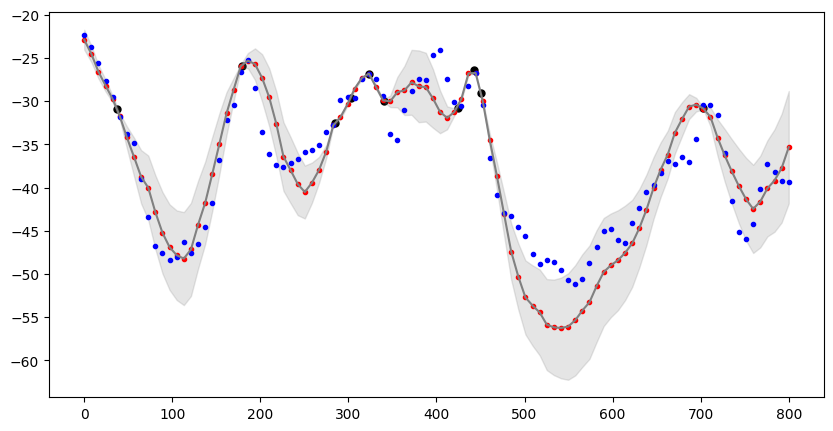

In [70]:
# Visualize the result
plt.figure(figsize=(10,5))
xdata=np.linspace(0,800,100)
yorg=y_test[25,:]
ydata=mean_200
plt.plot(xdata, ydata, 'or', markersize=3)
plt.plot(xdata, yorg, 'ob', markersize=3)
plt.plot(xdata, ydata, '-', color='gray')
plt.scatter(xmoho,zmoho,marker='o', s=25, c='black')
plt.fill_between(xdata,ydata - std_200, ydata + std_200,
                color='gray', alpha=0.2)
#plt.xlim(0, 10);

<h4> Using Bootstrapping

In [1]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 30.1 MB/s eta 0:00:00


In [2]:
import keras_tuner as kt

Using TensorFlow backend


In [ ]:
# Initialize rng
rng = np.random.default_rng(2022)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng.integers(500000))

y_pred=[]

for i in range(200):
  # split data into train-val-test
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=rng.integers(500000)) # 0.25 x 0.8 = 0.2

  model = Sequential()
  model.add(Dense(120, input_dim=100, activation=tf.nn.relu))
  model.add(Dense(200, activation=tf.nn.relu))
  model.add(Dense(100))
  opt = tf.optimizers.Adam(learning_rate=0.02)
  model.compile(loss='mae', optimizer=opt,metrics=['accuracy']) # try mse

  history=model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=250, verbose=0)

  y_pred.append(model.predict(X_test))
  ### predict using test datab

####predicted_models_200 = np.stack(NNSaltInversion(data_from_True_SaltModel,training=True) for iter in range(200))



<h4> Using AWGN

In [78]:
def awgn(signal, desired_snr, signal_power):
    """
    Add AWGN to the input signal to achieve the desired SNR level.
    """
    # Calculate the noise power based on the desired SNR and signal power
    noise_power = signal_power / (10**(desired_snr / 10))

    # Generate the noise with the calculated power
    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))

    # Add the noise to the original signal
    noisy_signal = signal + noise

    return noisy_signal



In [89]:
print (X_train[25,:])

[0.19 0.2  0.23 0.26 0.29 0.31 0.34 0.37 0.39 0.41 0.44 0.46 0.48 0.5
 0.52 0.54 0.55 0.56 0.55 0.53 0.5  0.47 0.43 0.4  0.36 0.34 0.32 0.3
 0.29 0.28 0.28 0.28 0.29 0.3  0.32 0.33 0.35 0.37 0.38 0.39 0.4  0.4
 0.4  0.4  0.4  0.4  0.4  0.4  0.41 0.41 0.42 0.43 0.45 0.46 0.47 0.49
 0.5  0.52 0.54 0.57 0.6  0.63 0.66 0.69 0.71 0.71 0.7  0.68 0.66 0.64
 0.62 0.6  0.6  0.59 0.59 0.58 0.57 0.56 0.55 0.53 0.51 0.5  0.48 0.47
 0.46 0.46 0.47 0.48 0.5  0.54 0.58 0.65 0.73 0.76 0.76 0.74 0.71 0.66
 0.59 0.48]


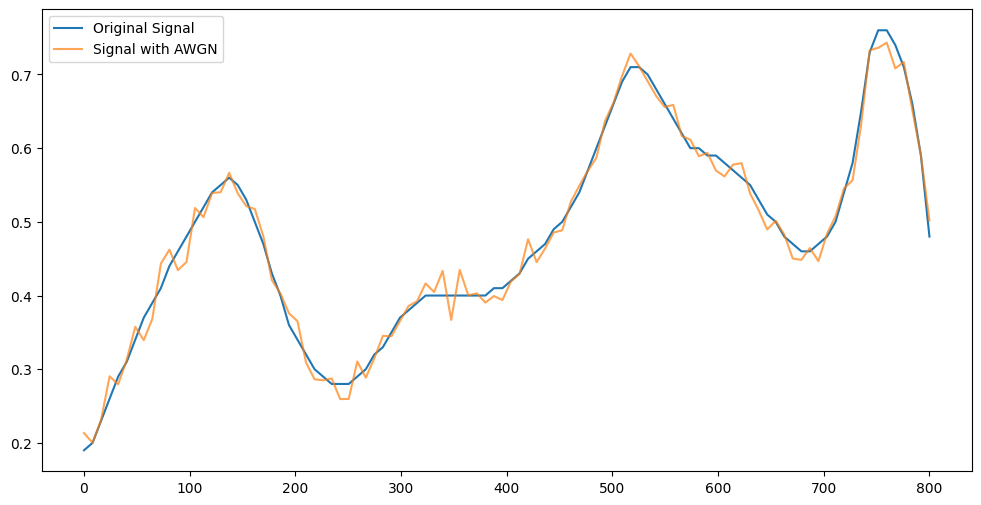

In [81]:
# Generate a sine wave signal
xdata=np.linspace(0,800,100)
signal=X_train[25,:]

# Calculate the power of the signal
signal_power = np.mean(signal**2)

# Add AWGN to the signal
noisy_signal = awgn(signal, desired_snr=30, signal_power=signal_power)

# Plot the original and noisy signals
plt.figure(figsize=(12, 6))
plt.plot(xdata, signal, label='Original Signal')
plt.plot(xdata, noisy_signal, label='Signal with AWGN', alpha=0.7)
plt.legend()
plt.show()

In [90]:
X_train_noisy=np.empty(X_train.shape)
print (X_train_noisy.shape)

for i in range(X_train.shape[0]):
  # Generate a sine wave signal
  signal=X_train[25,:]

  # Calculate the power of the signal
  signal_power = np.mean(signal**2)

  # Add AWGN to the signal
  noisy_signal = awgn(signal, desired_snr=30, signal_power=signal_power)

  # add to noisy train set
  X_train_noisy[i,:]=noisy_signal

print (X_train_noisy.shape)





(6000, 100)
(6000, 100)


In [ ]:
# Train denoising

<h4> Using Baysian Neural Network

In [65]:
#!pip install tensorflow-probability
import tensorflow_probability as tfp

In [64]:
# split data into train-val-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
# define BNN model
inputs = tf.keras.Input(shape=(100,))

<h4> Using cVAE